<a href="https://colab.research.google.com/github/navinkumar30/DS-Final-Project/blob/main/Chennai_House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project: Chennai House Price Prediction

#Importing Packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [2]:
df=pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Data Cleaning

In [3]:
df.shape

(7109, 22)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Cheking For NULL Values


In [6]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Filling NULL Values


In [7]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].mean(), inplace =True)
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mean(), inplace =True)
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mean(), inplace =True)

In [8]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Droping Duplicates Values If There

In [10]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Dropping Not Required  Columns From The Dataset

In [12]:
df1 = df.drop(["PRT_ID","REG_FEE","COMMIS"], axis="columns") 
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


Converting Datatypes From Float To Int



In [13]:
df1["QS_ROOMS"] = np.floor(pd.to_numeric(df1["QS_ROOMS"])).astype("Int64")
df1["QS_BATHROOM"] = np.floor(pd.to_numeric(df1["QS_BATHROOM"])).astype("Int64")
df1["QS_BEDROOM"] = np.floor(pd.to_numeric(df1["QS_BEDROOM"])).astype("Int64")
df1["QS_OVERALL"] = np.floor(pd.to_numeric(df1["QS_OVERALL"])).astype("Int64")
df1["N_BATHROOM"] = np.floor(pd.to_numeric(df1["N_BATHROOM"])).astype("Int64")
df1["N_BEDROOM"] = np.floor(pd.to_numeric(df1["N_BEDROOM"])).astype("Int64")

In [14]:
df1['BUILDTYPE'] = df1['BUILDTYPE'].replace(['Other', 'Comercial'],['Others','Commercial'])

Converting The DATE_SALE And DATE_BUILD Datatypes From Object To Datetime

In [15]:
df1["DATE_SALE"] = pd.to_datetime(df1["DATE_SALE"])
df1["DATE_BUILD"] = pd.to_datetime(df1["DATE_BUILD"])

Updating New Features To The Dataframe

In [16]:
df1["HOUSE_AGE"] = df1["DATE_SALE"]-df1["DATE_BUILD"]
df1["HOUSE_AGE"].head()

0   16031 days
1    4015 days
2    7152 days
3    8030 days
4   10802 days
Name: HOUSE_AGE, dtype: timedelta64[ns]

Converting HOUSE_AGE Datatype From Timedelta64 To Float64

In [17]:
df1["HOUSE_AGE"] = df1["HOUSE_AGE"]/np.timedelta64(1,"Y")
df1["HOUSE_AGE"] = np.round(df1["HOUSE_AGE"])
df1["HOUSE_AGE"].head()

0    44.0
1    11.0
2    20.0
3    22.0
4    30.0
Name: HOUSE_AGE, dtype: float64

In [18]:
df1["HOUSE_AGE"] = np.floor(pd.to_numeric(df1["HOUSE_AGE"])).astype("Int64")

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   Int64         
 5   N_BATHROOM     7109 non-null   Int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   Int64         
 15  QS_BATHROOM    7109 n

Dropping Date_build and Date_sale

In [20]:
df1 = df1.drop(["DATE_BUILD","DATE_SALE"], axis=1)
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3,2,2,2,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3,4,3,3,10818480,9
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4,4,2,3,8351410,29
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4,3,4,4,8507000,31


In [21]:
df2 = df1.copy()
df2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3,2,2,2,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3,4,3,3,10818480,9
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4,4,2,3,8351410,29
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4,3,4,4,8507000,31


In [22]:
features = [feature for feature in df2.columns if df2[feature].dtypes == "O"]
features = df2[features]
for feature in features:
  print("The feature is {} and number of categories are  = {}".format(feature,(df2[feature].unique())))

The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
The feature is SALE_COND and number of categories are  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
The feature is PARK_FACIL and number of categories are  = ['Yes' 'No' 'Noo']
The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'House']
The feature is UTILITY_AVAIL and number of categories are  = ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']


Using Replacement Function To Correct The Spelling Mistakes

In [23]:
df2['AREA'] = df2.AREA.replace('Karapakam', 'Karapakkam')
df2['AREA'] = df2.AREA.replace('Ann Nagar', 'Anna Nagar')
df2['AREA'] = df2.AREA.replace('Adyr', 'Adyar')
df2['AREA'] = df2.AREA.replace('Velchery', 'Velachery')
df2['AREA'] = df2.AREA.replace('Chrompet', 'Chromepet')
df2['AREA'] = df2.AREA.replace('Chrompt', 'Chromepet')
df2['AREA'] = df2.AREA.replace('Chrmpet', 'Chromepet')
df2['AREA'] = df2.AREA.replace('Chormpet', 'Chromepet')
df2['AREA'] = df2.AREA.replace('TNagar', 'T Nagar')
df2['AREA'] = df2.AREA.replace('Ana Nagar', 'Anna Nagar')
df2['AREA'] = df2.AREA.replace('KKNagar', 'KK Nagar')

In [24]:
df2['SALE_COND'] = df2.SALE_COND.replace('AbNormal', 'Abnormal')
df2['SALE_COND'] = df2.SALE_COND.replace('Ab Normal', 'Abnormal')
df2['SALE_COND'] = df2.SALE_COND.replace('Partiall', 'Partial')
df2['SALE_COND'] = df2.SALE_COND.replace('PartiaLl', 'Partial')
df2['SALE_COND'] = df2.SALE_COND.replace('Adj Land', 'AdjLand')

In [25]:
df2['STREET'] = df2['STREET'].replace('Pavd', 'Paved')
df2['STREET'] = df2['STREET'].replace('NoAccess', 'No Access')

In [26]:
df2["PARK_FACIL"] = df2["PARK_FACIL"].replace(["Noo"],["No"])

In [27]:
df2['UTILITY_AVAIL'] = df2['UTILITY_AVAIL'].replace('AllPub' , 'All Pub')
df2['UTILITY_AVAIL'] = df2['UTILITY_AVAIL'].replace('NoSewr ', 'NoSeWa')

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   DIST_MAINROAD  7109 non-null   int64 
 3   N_BEDROOM      7109 non-null   Int64 
 4   N_BATHROOM     7109 non-null   Int64 
 5   N_ROOM         7109 non-null   int64 
 6   SALE_COND      7109 non-null   object
 7   PARK_FACIL     7109 non-null   object
 8   BUILDTYPE      7109 non-null   object
 9   UTILITY_AVAIL  7109 non-null   object
 10  STREET         7109 non-null   object
 11  MZZONE         7109 non-null   object
 12  QS_ROOMS       7109 non-null   Int64 
 13  QS_BATHROOM    7109 non-null   Int64 
 14  QS_BEDROOM     7109 non-null   Int64 
 15  QS_OVERALL     7109 non-null   Int64 
 16  SALES_PRICE    7109 non-null   int64 
 17  HOUSE_AGE      7109 non-null   Int64 
dtypes: Int64(7), int64(4), objec

# Data Visualization

Visualize Area vs Sales_price

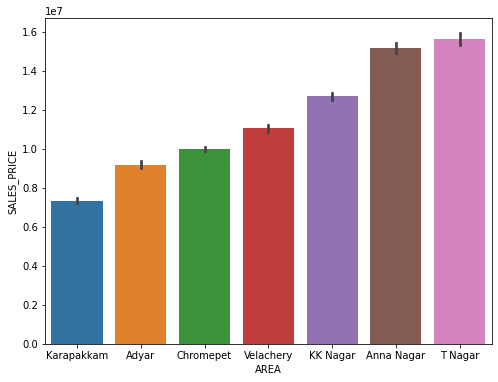

In [29]:
plt.figure(figsize= (8,6))
sns.barplot(x="AREA",y="SALES_PRICE",data=df2,order=df2.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

* There is a Linear Relationship Between Area And Sales_Price
* Hence We Are Using Lable Encoding

Lable Encoding

In [30]:
df2["AREA"] = df2["AREA"].map({"Karapakkam": 1 , "Adyar" : 2, "Chromepet" : 3, "Velachery" : 4, "KK Nagar" : 5, "Anna Nagar" : 6, "T Nagar" : 7})
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,1,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4,3,4,4,7600000,44
1,6,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4,4,2,3,21717770,11
2,2,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20
3,4,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,I,4,3,3,4,9630290,22
4,1,1226,84,1,1,3,Abnormal,Yes,Others,All Pub,Gravel,C,3,2,4,3,7406250,30



 Scatter Plot To Visualize Int_sqft

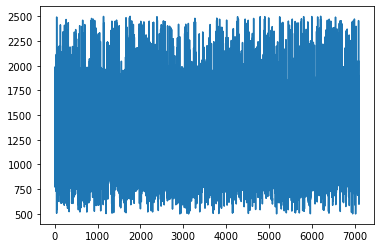

In [31]:
df2["INT_SQFT"].plot()

Visualize Dist_mainroad 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


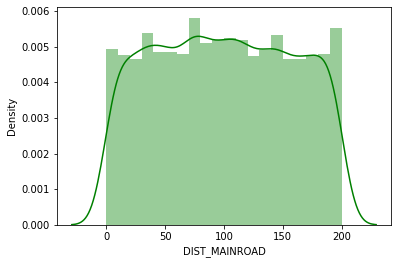

In [32]:
sns.distplot(df2["DIST_MAINROAD"], color = "green")

Visualize N_bedroom vs Sales_price

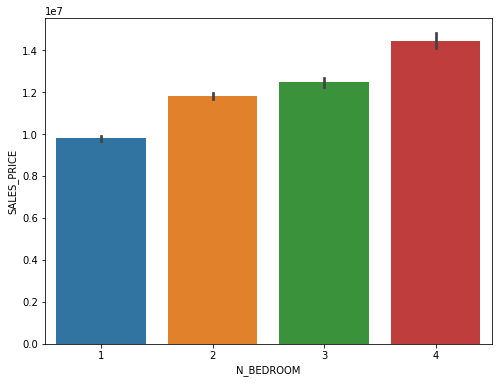

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x = "N_BEDROOM", y = "SALES_PRICE", data = df2)

 * There is a Linear Relationship Between N_bedroom And Sales_price

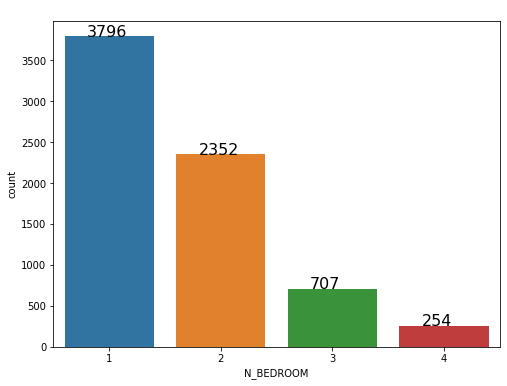

In [34]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x=df2["N_BEDROOM"], data=df2);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha="left", va="baseline", color = "black", size=16)

* House with 1 bedroom are more in count.

Visualize N_bathroom vs Sales_price

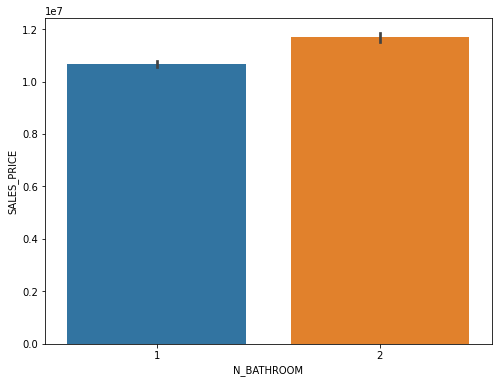

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x = "N_BATHROOM", y = "SALES_PRICE", data = df2)

* There is a Linear Relationship Between N_bedroom And Sales_price



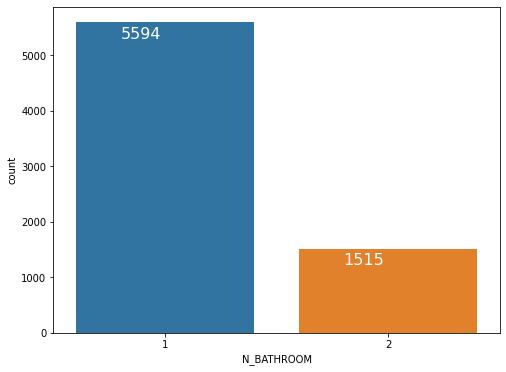

In [36]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x=df2["N_BATHROOM"], data=df2);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha = "left", va = "center_baseline", color = "white", size=16)

* House With 1 Bathroom Has High Value Count

Visualize N_room vs Sales_price

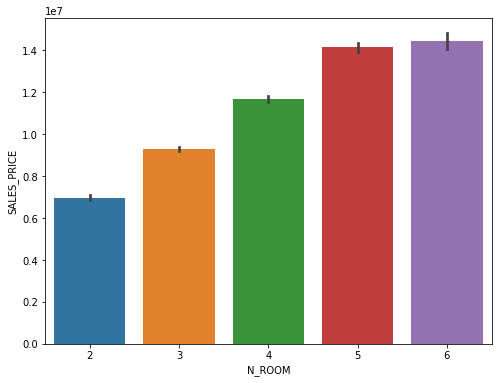

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x = "N_ROOM", y = "SALES_PRICE", data = df2)

* There is a Linear Relationship Between N_room And Sales_price

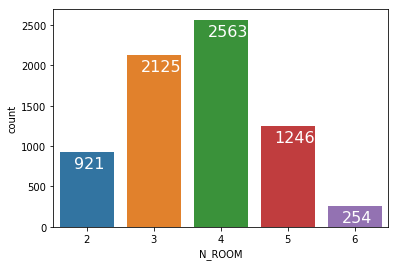

In [38]:
ax=sns.countplot(x=df2["N_ROOM"], data=df2);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha = "left", va="center_baseline", color = "white", size=16)

* House With 4 Rooms Has High value count

Visualize Sales_cond vs Sales_price

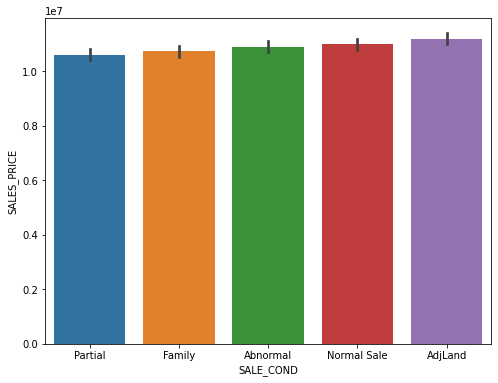

In [39]:
plt.figure(figsize= (8,6))
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df2,order=df2.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])

* There is a slide Linear Relationship Between Sale_cond And Sales_price
* Hence We Are Using Lable Encoding

In [40]:
df2['SALE_COND'] = df2['SALE_COND'].map({'Partial': 1 , 'Family' : 2, 'Abnormal' : 4, 'Normal Sale' : 5, 'AdjLand' : 6})

Visualize Park_facil vs Sales_price

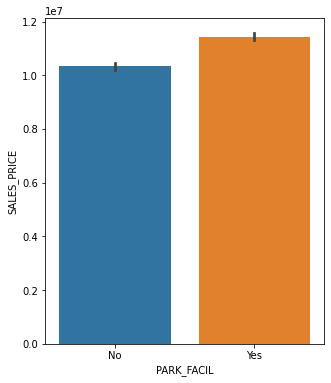

In [41]:
plt.figure(figsize= (5,6))
sns.barplot(x="PARK_FACIL", y ="SALES_PRICE",data=df2,order=df2.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])

* There is a Linear Relationship Between Parl_facil And Sales_price
* Hence We Are Using Lable Encoding

In [42]:
df2["PARK_FACIL"] = df2["PARK_FACIL"].map({"Yes": 0 , "No" : 1})

Visualize Bulidtype vs Sales_price

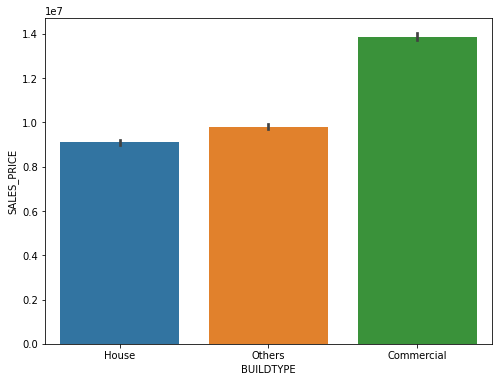

In [43]:
plt.figure(figsize= (8,6))
sns.barplot(x="BUILDTYPE", y ="SALES_PRICE",data=df2,order=df2.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])

* There Is No Linear Relation Between Buildtype And Sales_price 
* Hence We Go For One Hot Encoding

In [44]:
df2 = pd.get_dummies(df2, columns = ["BUILDTYPE"])
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,All Pub,Paved,A,4,3,4,4,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,All Pub,Gravel,RH,4,4,2,3,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,ELO,Gravel,RL,4,3,2,3,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,NoSeWa,Paved,I,4,3,3,4,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,All Pub,Gravel,C,3,2,4,3,7406250,30,0,0,1


Visualize Utility_avail vs Sales_price

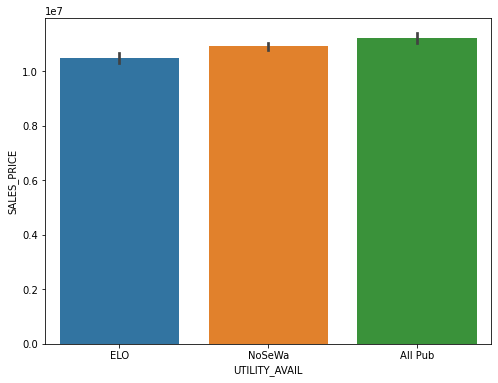

In [45]:
plt.figure(figsize= (8,6))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df2,order=df2.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

* There is a Linear Relationship Between Utility_Avail And Sales_price
* Hence We Are Using Lable Encoding

In [46]:
df2["UTILITY_AVAIL"] = df2["UTILITY_AVAIL"].map({"ELO": 1 , "NoSeWa" : 2, "All Pub":3})

Visualize Street vs Sales_price

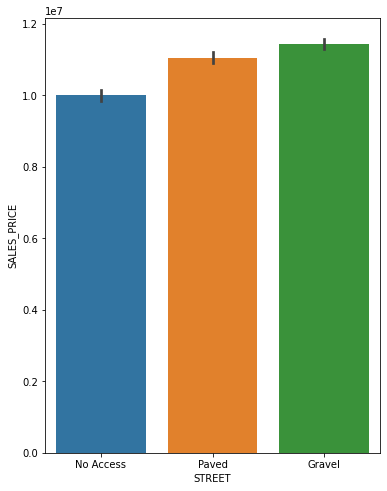

In [47]:
plt.figure(figsize= (6,8))
sns.barplot(x="STREET",y="SALES_PRICE",data=df2,order=df2.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

* There is a Linear Relationship Between Street And Sales_price
* Hence We Are Using Lable Encoding

In [48]:
df2["STREET"] = df2["STREET"].map({"No Access": 1 , "Paved" : 2, "Gravel":3})

Visualize Mzzone vs Sales_price

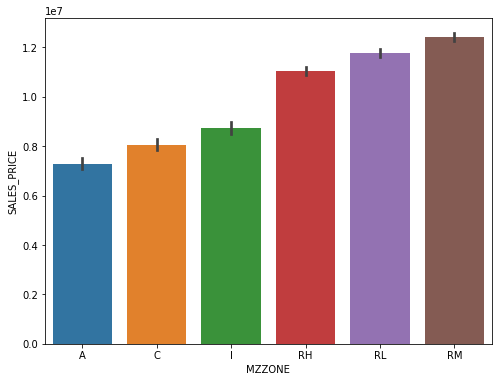

In [49]:
plt.figure(figsize= (8,6))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=df2,order=df2.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

* There is a Linear Relationship Between Mzzone And Sales_price
* Hence We Are Using Lable Encoding

In [50]:
df2["MZZONE"] = df2["MZZONE"].map({"A": 1 , "C" : 2, "I": 3, "RH": 4, "RL" : 5, "RM" : 6})

Scatter Plot For The House_age And Sales_price

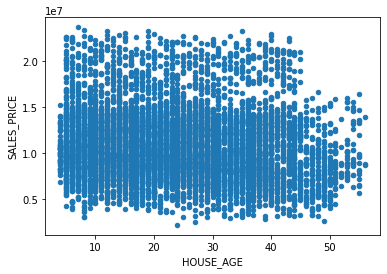

In [51]:
import plotly.express as px
df2.plot.scatter(x="HOUSE_AGE", y="SALES_PRICE")

Histogram Plot To Know About The Graphical Form Of The Datasets 

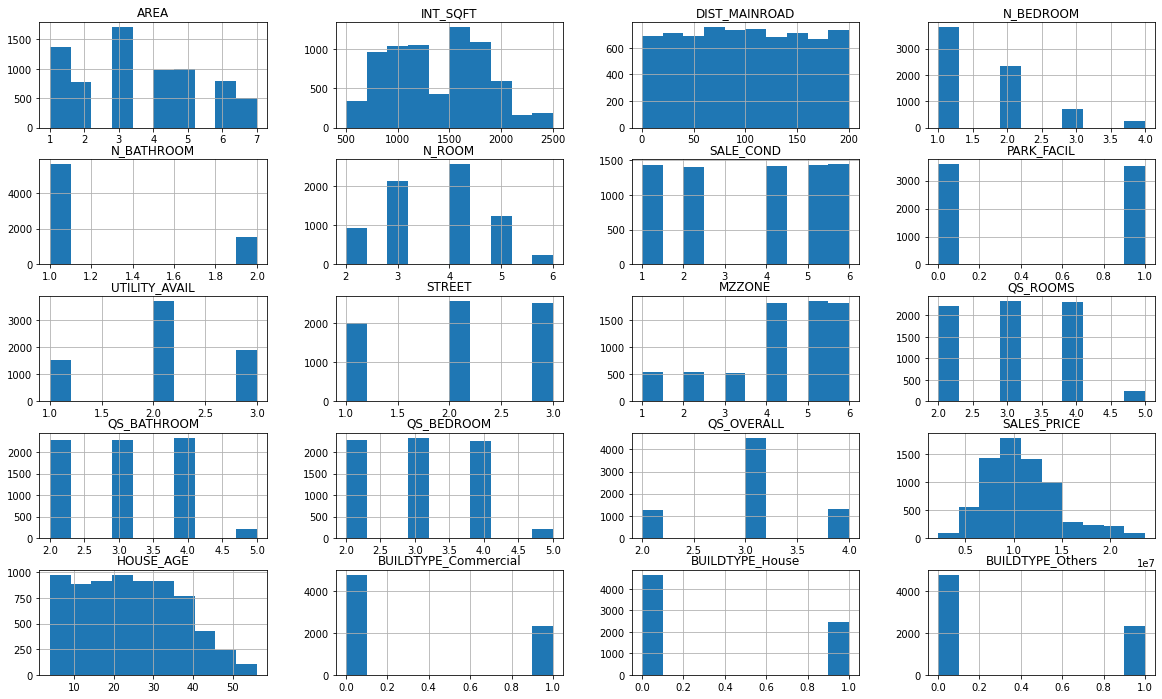

In [52]:
df2.hist(bins=10,figsize=(20,12))
plt.show()

Heat Map

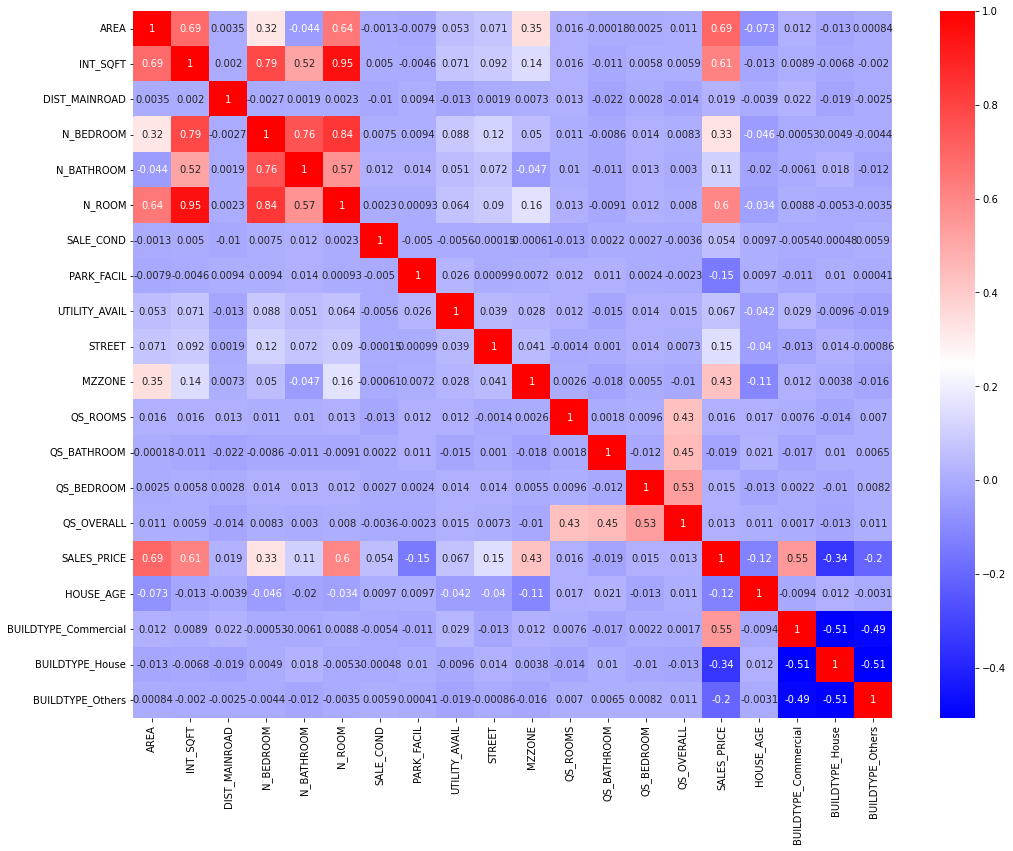

In [53]:
plt.figure(figsize=(17,13))
sns.heatmap(df2.corr(),cmap="bwr" ,annot=True)

In [54]:
df2.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
AREA,1.000000,0.685243,0.003487,0.320889,-0.044401,0.644971,-0.001293,-0.007916,0.053165,0.071459,0.346385,0.015984,-0.000182,0.002504,0.010575,0.694149,-0.072690,0.012488,-0.013170,0.000839
INT_SQFT,0.685243,1.000000,0.002022,0.786263,0.515290,0.951279,0.004957,-0.004618,0.070971,0.091727,0.143226,0.016146,-0.011463,0.005847,0.005862,0.612125,-0.013257,0.008927,-0.006848,-0.001995
DIST_MAINROAD,0.003487,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.010034,0.009448,-0.013213,0.001942,0.007334,0.013050,-0.021857,0.002757,-0.014337,0.018783,-0.003911,0.022109,-0.019417,-0.002458
N_BEDROOM,0.320889,0.786263,-0.002723,1.000000,0.755207,0.840209,0.007536,0.009357,0.087665,0.117058,0.049928,0.011434,-0.008603,0.014449,0.008314,0.330987,-0.046251,-0.000534,0.004914,-0.004435
N_BATHROOM,-0.044401,0.515290,0.001850,0.755207,1.000000,0.568541,0.011741,0.014033,0.051341,0.071575,-0.047164,0.010452,-0.011005,0.013390,0.002951,0.108834,-0.020363,-0.006099,0.018195,-0.012305
N_ROOM,0.644971,0.951279,0.002301,0.840209,0.568541,1.000000,0.002311,0.000934,0.064489,0.089961,0.163697,0.013468,-0.009066,0.012072,0.008002,0.602760,-0.034009,0.008826,-0.005288,-0.003472
SALE_COND,-0.001293,0.004957,-0.010034,0.007536,0.011741,0.002311,1.000000,-0.004965,-0.005590,-0.000152,-0.000614,-0.012929,0.002198,0.002724,-0.003559,0.053965,0.009695,-0.005379,-0.000480,0.005860
PARK_FACIL,-0.007916,-0.004618,0.009448,0.009357,0.014033,0.000934,-0.004965,1.000000,0.025735,0.000990,0.007192,0.012234,0.011484,0.002365,-0.002264,-0.146428,0.009722,-0.010702,0.010172,0.000407
UTILITY_AVAIL,0.053165,0.070971,-0.013213,0.087665,0.051341,0.064489,-0.005590,0.025735,1.000000,0.038698,0.027885,0.012001,-0.014955,0.013911,0.014981,0.067147,-0.041503,0.029261,-0.009642,-0.019488
STREET,0.071459,0.091727,0.001942,0.117058,0.071575,0.089961,-0.000152,0.000990,0.038698,1.000000,0.041091,-0.001417,0.001033,0.013950,0.007250,0.149589,-0.040218,-0.013480,0.014170,-0.000860


In [56]:
df3 = df2.copy()
df3.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,2,1,4,3,4,4,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,3,4,4,4,2,3,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,5,4,3,2,3,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,2,3,4,3,3,4,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,3,2,3,2,4,3,7406250,30,0,0,1


In [57]:
df3["SALES_PRICE"].describe().T

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

* Described The Count, Mean, Standard Deviation, Min, Max Of The Sales_price Using Describe() Function

In [58]:
df3.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

In [59]:
df3.describe()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7109.000000,7109.000000,7109.000000
mean,3.539738,1382.073006,99.603179,1.636939,1.213110,3.688704,3.605570,0.495428,2.051343,2.070755,4.317344,3.075538,3.069349,3.056126,3.004501,1.089491e+07,24.300042,0.327613,0.343790,0.328598
std,1.846837,457.410902,57.403110,0.802881,0.409534,1.019099,1.859667,0.500014,0.690626,0.795794,1.498831,0.872937,0.876024,0.871499,0.603154,3.768603e+06,12.307659,0.469376,0.475005,0.469736
min,1.000000,500.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,4.000000,0.000000,0.000000,0.000000
25%,2.000000,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,0.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,3.000000,8.272100e+06,14.000000,0.000000,0.000000,0.000000
50%,3.000000,1373.000000,99.000000,1.000000,1.000000,4.000000,4.000000,0.000000,2.000000,2.000000,5.000000,3.000000,3.000000,3.000000,3.000000,1.033505e+07,23.000000,0.000000,0.000000,0.000000
75%,5.000000,1744.000000,148.000000,2.000000,1.000000,4.000000,5.000000,1.000000,3.000000,3.000000,6.000000,4.000000,4.000000,4.000000,3.000000,1.299390e+07,34.000000,1.000000,1.000000,1.000000
max,7.000000,2500.000000,200.000000,4.000000,2.000000,6.000000,6.000000,1.000000,3.000000,3.000000,6.000000,5.000000,5.000000,5.000000,4.000000,2.366734e+07,56.000000,1.000000,1.000000,1.000000


In [60]:
Numericals = [feature for feature in df3.columns if df3[feature].dtype!='O' and feature !="SALES_PRICE"]
print("Number of Numerical independent Features : {}".format(len(Numericals)))

Number of Numerical independent Features : 19


In [61]:
df3[Numericals].head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,2,1,4,3,4,4,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,3,4,4,4,2,3,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,5,4,3,2,3,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,2,3,4,3,3,4,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,3,2,3,2,4,3,30,0,0,1


# Data Splitting

Splitting Independent Variable And Target Variable

In [62]:
df3.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,2,1,4,3,4,4,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,3,4,4,4,2,3,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,5,4,3,2,3,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,2,3,4,3,3,4,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,3,2,3,2,4,3,7406250,30,0,0,1


In [63]:
X = df3[["AREA","INT_SQFT","DIST_MAINROAD","N_BEDROOM", "N_BATHROOM" , "N_ROOM" , "QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","HOUSE_AGE","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others"]]
y = df3["SALES_PRICE"]
from sklearn.model_selection import train_test_split

* X is a Independent Variable  
* y is a Target Variable

 Numerical Features of X and y

In [64]:
print(X)
print(y)

      AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0        1      1004            131          1           1       3         4   
1        6      1986             26          2           1       5         4   
2        2       909             70          1           1       3         4   
3        4      1855             14          3           2       5         4   
4        1      1226             84          1           1       3         3   
...    ...       ...            ...        ...         ...     ...       ...   
7104     1       598             51          1           1       2         3   
7105     4      1897             52          3           2       5         3   
7106     4      1614            152          2           1       4         4   
7107     1       787             40          1           1       2         4   
7108     4      1896            156          3           2       5         3   

      QS_BATHROOM  QS_BEDROOM  QS_OVERA

Splitted The Data Into X_train, X_test And y_train, y_test Using Train_Test_Split() Function

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 0)

In [66]:
X_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
1806,6,1930,163,2,1,5,2,3,2,2,1,1,2,3,6,44,0,1,0
3725,6,1626,27,1,1,4,3,3,4,4,2,0,1,3,4,38,0,0,1
4198,6,1692,128,1,1,4,2,3,4,3,1,1,1,2,4,17,1,0,0
6478,6,1548,123,1,1,4,3,5,4,4,2,0,2,2,4,35,0,0,1
5962,1,909,125,1,1,3,3,2,2,2,2,1,2,2,4,27,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6,1532,172,1,1,4,4,4,3,3,6,0,2,3,5,34,0,1,0
3264,4,1572,95,2,1,4,4,5,3,4,4,1,2,1,6,29,1,0,0
1653,5,2087,31,3,2,5,5,4,3,4,1,0,3,3,4,5,0,1,0
2607,4,1754,166,2,1,4,2,4,2,3,5,0,2,3,6,18,1,0,0


In [67]:
print(X.shape, X_train.shape, X_test.shape)

(7109, 19) (5331, 19) (1778, 19)


In [68]:
df3.isna().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
HOUSE_AGE               0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

# New Section

Feature Scaling

The X_test And The X_train Has Been Scaled Using The Standard Scaler


In [69]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection and evaluation

Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

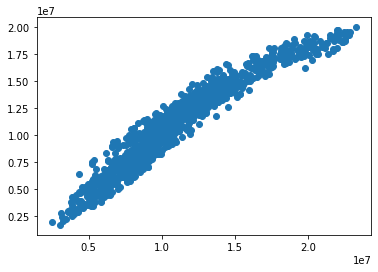

In [71]:
pred =regressor.predict(X_test)
plt.scatter(y_test, pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


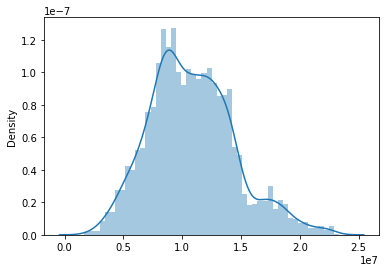

In [72]:
sns.distplot((y_test, pred),bins=50)

* Distplot For y_test Prediction To See The Model Is Well Shaped

In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 92.21 %
Standard Deviation: 0.43 %


Result

* Linear Regression Model gives 92.23%

Cross validation for K Nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsRegressor
kn_regressor = KNeighborsRegressor()

In [75]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = kn_regressor , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 89.77 %
Standard Deviation: 0.98 %


* K Nearest Neighbors model gives 89.72%

Cross validation for Decision Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state = 0)

In [77]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_tree , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 96.54 %
Standard Deviation: 0.33 %


* Decision Tree Model gives 96.47%

Cross validation for Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators= 10, random_state = 0)

In [79]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_forest , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 98.37 %
Standard Deviation: 0.11 %


* Random Forest Model gives 98.32%

Cross validation for XGBOOST

In [80]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective ='reg:squarederror')

In [81]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = xg_reg , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 99.10 %
Standard Deviation: 0.09 %


* XGBoost Model gives 99.06%

In [82]:
import pandas as pd

c = pd.DataFrame({'Regressor': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
                  'Cross-validation Score (%)' : [92.21, 89.77, 96.54, 98.37, 99.10]})
c

,Regressor,Cross-validation Score (%)
0,Linear Regression,92.21
1,KNN,89.77
2,Decision Tree,96.54
3,Random Forest,98.37
4,XGBoost,99.06


* This XGBoost Regression model predicts High score of 99.06%

In [83]:
xg_reg.fit(X_train, y_train)
pred = xg_reg.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
r = r2_score(y_test, pred)
r

0.9920025122925306

In [85]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(xg_reg)
sel.fit(X_train, y_train)

SelectFromModel(estimator=XGBRegressor(objective='reg:squarederror'))

In [86]:
sel.get_support()

array([ True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False])

In [87]:
features = X.columns[sel.get_support()]
features

Index(['AREA', 'INT_SQFT', 'N_ROOM', 'MZZONE', 'BUILDTYPE_Commercial'], dtype='object')

* Top 5 Important Features Are AREA, INT_SQFT, N_ROOM, BUILDTYPE_Commercial